# Activities

## Get data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import necessary libraries and packages

import pandas as pd
from data import Bellabeat
from activities import Activities

In [3]:
# bb = Bellabeat()
ac = Activities()
# activities_df = ac.get_activities_data()
# activities_df.head()

In [4]:
activities_df = ac.clean_data()

Initial information:
Number of duplicate rows: 0
Column names: Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')
Id                                   int64
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes    

In [5]:
import matplotlib.pyplot as plt

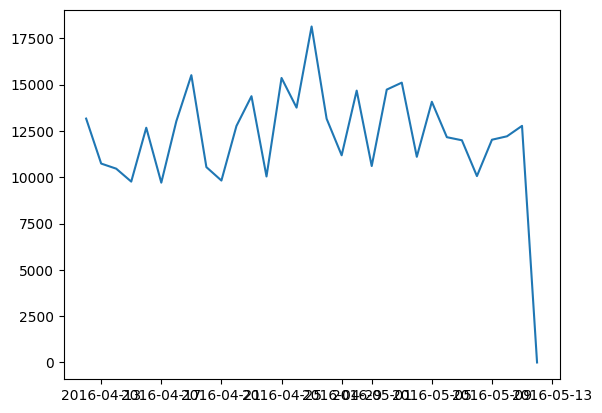

In [6]:
id_1 = activities_df[activities_df["id"] == 1503960366]
plt.plot(id_1["activity_date"], id_1["total_steps"])
plt.show()

In [7]:
import seaborn as sns

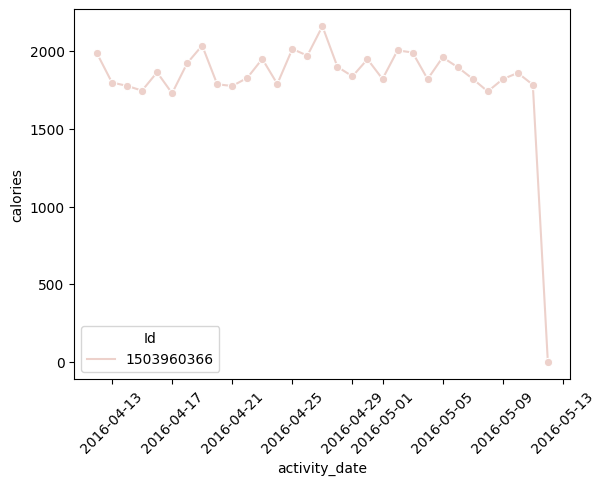

In [8]:
plt.figure()
sns.lineplot(data=id_1, x="activity_date", y="calories", hue="id", marker="o")
plt.xticks(rotation=45)
plt.legend(title="Id")
plt.show()

In [9]:
activities_df.duplicated().sum()

0

In [10]:
ac.clean_data()

Initial information:
Number of duplicate rows: 0
Column names: Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')
Id                                   int64
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes    

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [11]:
# First, calculate the mean steps per user as before
user_activity_level = activities_df.groupby('id')['total_steps'].mean().reset_index()
user_activity_level = user_activity_level.rename(columns={'total_steps': 'user_activity_level'})

# Now, categorize user activity level
bins = [0, 4999, 7499, 9999, float('inf')]
labels = ['sedentary', 'slightly_active', 'fairly_active', 'very_active']
user_activity_level['activity_category'] = pd.cut(user_activity_level['user_activity_level'], bins=bins, labels=labels)

# Merge the categorized activity level back into the original DataFrame
new_df = activities_df.merge(user_activity_level[['id', 'activity_category']], on='id', how='left')

In [12]:
new_df.head()

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,activity_category
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,very_active
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,very_active
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,very_active
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,very_active
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,very_active


In [13]:
df = ac.get_activities_data()

Initial information:
Number of duplicate rows: 0
Column names: Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')
Id                                   int64
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes    

In [14]:
df.columns

Index(['id', 'activity_date', 'total_steps', 'total_distance',
       'tracker_distance', 'logged_activities_distance',
       'very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       'activity_category'],
      dtype='object')

In [17]:
# # Step 1: Calculate mean steps per user as before
# user_activity_level = activities_df.groupby('id')['total_steps'].mean().reset_index()
# user_activity_level = user_activity_level.rename(columns={'total_steps': 'activity_level'})

# # Step 2: Categorize each user's mean steps into activity levels
# bins = [0, 4999, 7499, 9999, float('inf')]
# labels = ['sedentary', 'slightly active', 'fairly active', 'very active']
# user_activity_level['activity_category'] = pd.cut(user_activity_level['activity_level'], bins=bins, labels=labels)

# # Step 3: Calculate the percentage of users in each activity level
activity_counts = user_activity_level['activity_category'].value_counts(normalize=True) * 100
activity_percentage = activity_counts.reset_index()
activity_percentage.columns = ['activity_level', 'percentage']

# Display the percentage distribution
print(activity_percentage)

    activity_level  percentage
0  slightly_active   27.272727
1    fairly_active   27.272727
2        sedentary   24.242424
3      very_active   21.212121


In [18]:
# Set the order for activity levels
activity_percentage['activity_level'] = pd.Categorical(activity_percentage['activity_level'], 
                                                       categories=['sedentary', 'slightly_active', 'fairly_active', 'very_active'],
                                                       ordered=True)

# Sort by the defined categorical order
activity_percentage = activity_percentage.sort_values('activity_level').reset_index(drop=True)

# Display the reordered result
print(activity_percentage)

    activity_level  percentage
0        sedentary   24.242424
1  slightly_active   27.272727
2    fairly_active   27.272727
3      very_active   21.212121


<AxesSubplot:xlabel='activity_category', ylabel='count'>

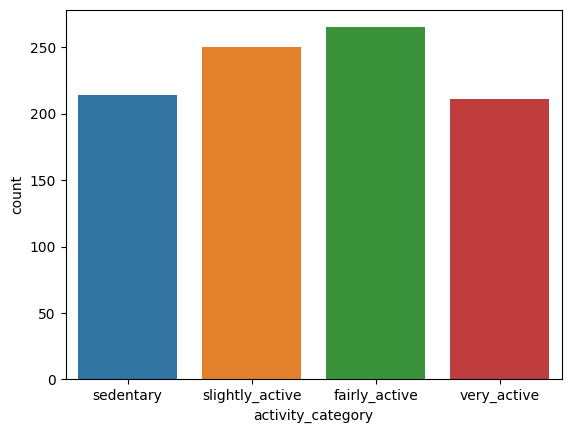

In [28]:
sns.countplot(data=df, x="activity_category")